<a href="https://colab.research.google.com/github/piyushyadav2233/pca.assisgnment-/blob/main/covid_19eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error


In [132]:
df=pd.read_csv('/content/country_vaccinations.csv.zip')
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25857,Zimbabwe,ZWE,2021-06-16,1120873.0,697399.0,423474.0,7395.0,5270.0,7.54,4.69,2.85,355.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...
25858,Zimbabwe,ZWE,2021-06-17,1126087.0,698953.0,427134.0,5214.0,5226.0,7.58,4.70,2.87,352.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...
25859,Zimbabwe,ZWE,2021-06-18,1131397.0,700244.0,431153.0,5310.0,4935.0,7.61,4.71,2.90,332.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...
25860,Zimbabwe,ZWE,2021-06-19,1133920.0,701348.0,432572.0,2523.0,4360.0,7.63,4.72,2.91,293.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              25862 non-null  object 
 1   iso_code                             25862 non-null  object 
 2   date                                 25862 non-null  object 
 3   total_vaccinations                   14522 non-null  float64
 4   people_vaccinated                    13762 non-null  float64
 5   people_fully_vaccinated              11041 non-null  float64
 6   daily_vaccinations_raw               12003 non-null  float64
 7   daily_vaccinations                   25595 non-null  float64
 8   total_vaccinations_per_hundred       14522 non-null  float64
 9   people_vaccinated_per_hundred        13762 non-null  float64
 10  people_fully_vaccinated_per_hundred  11041 non-null  float64
 11  daily_vaccinations_per_milli

In [134]:
df.isnull().sum()

,0
country,0
iso_code,0
date,0
total_vaccinations,11340
people_vaccinated,12100
people_fully_vaccinated,14821
daily_vaccinations_raw,13859
daily_vaccinations,267
total_vaccinations_per_hundred,11340
people_vaccinated_per_hundred,12100


In [78]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.452200e+04,1.376200e+04,1.104100e+04,1.200300e+04,2.559500e+04,14522.000000,13762.000000,11041.000000,25595.000000
mean,9.139252e+06,4.737802e+06,2.681353e+06,2.012910e+05,1.020430e+05,24.162602,16.291051,9.712350,3312.476421
std,4.592776e+07,1.797156e+07,1.093032e+07,1.122962e+06,7.304361e+05,30.690367,18.839369,13.466102,4512.443697
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.005620e+05,7.876700e+04,3.719700e+04,3.967500e+03,8.400000e+02,2.360000,2.052500,1.020000,389.000000
50%,7.007560e+05,5.149065e+05,2.834740e+05,1.988600e+04,6.263000e+03,11.410000,8.520000,4.190000,1726.000000
75%,3.241681e+06,2.139073e+06,1.192415e+06,8.257600e+04,3.337300e+04,34.650000,25.207500,12.690000,4874.000000
max,1.029223e+09,6.220000e+08,2.232990e+08,2.360500e+07,2.029871e+07,231.010000,116.150000,114.860000,118759.000000


In [135]:
df.shape

(25862, 15)

In [136]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [137]:
df.dtypes

,0
country,object
iso_code,object
date,object
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


In [82]:
df.nunique()

,0
country,217
iso_code,217
date,201
total_vaccinations,14100
people_vaccinated,13240
people_fully_vaccinated,10399
daily_vaccinations_raw,10485
daily_vaccinations,14902
total_vaccinations_per_hundred,5699
people_vaccinated_per_hundred,4619


In [138]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [139]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
25857,Zimbabwe,ZWE,2021-06-16,1120873.0,697399.0,423474.0,7395.0,5270.0,7.54,4.69,2.85,355.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...
25858,Zimbabwe,ZWE,2021-06-17,1126087.0,698953.0,427134.0,5214.0,5226.0,7.58,4.70,2.87,352.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...
25859,Zimbabwe,ZWE,2021-06-18,1131397.0,700244.0,431153.0,5310.0,4935.0,7.61,4.71,2.90,332.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...
25860,Zimbabwe,ZWE,2021-06-19,1133920.0,701348.0,432572.0,2523.0,4360.0,7.63,4.72,2.91,293.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...
25861,Zimbabwe,ZWE,2021-06-20,1138733.0,703065.0,435668.0,4813.0,4525.0,7.66,4.73,2.93,304.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1406690528...


In [140]:
df.duplicated().sum()


0

In [141]:
df.drop_duplicates(inplace=True)

In [142]:
df.select_dtypes(include='number').corr()


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.987670,0.947945,0.904553,0.924193,0.134628,0.183754,0.158416,0.104724
people_vaccinated,0.987670,1.000000,0.886103,0.834721,0.883745,0.164468,0.167662,0.123138,0.066278
people_fully_vaccinated,0.947945,0.886103,1.000000,0.645203,0.695918,0.195241,0.181774,0.211490,0.063586
daily_vaccinations_raw,0.904553,0.834721,0.645203,1.000000,0.981220,0.059139,0.091305,0.037843,0.100359
daily_vaccinations,0.924193,0.883745,0.695918,0.981220,1.000000,0.060808,0.100539,0.039681,0.093884
total_vaccinations_per_hundred,0.134628,0.164468,0.195241,0.059139,0.060808,1.000000,0.978516,0.960595,0.573810
people_vaccinated_per_hundred,0.183754,0.167662,0.181774,0.091305,0.100539,0.978516,1.000000,0.889948,0.621961
people_fully_vaccinated_per_hundred,0.158416,0.123138,0.211490,0.037843,0.039681,0.960595,0.889948,1.000000,0.529934
daily_vaccinations_per_million,0.104724,0.066278,0.063586,0.100359,0.093884,0.573810,0.621961,0.529934,1.000000


In [88]:
df['date'] = pd.to_datetime(df['date'])


In [143]:
df.select_dtypes(include='number').corr()


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.987670,0.947945,0.904553,0.924193,0.134628,0.183754,0.158416,0.104724
people_vaccinated,0.987670,1.000000,0.886103,0.834721,0.883745,0.164468,0.167662,0.123138,0.066278
people_fully_vaccinated,0.947945,0.886103,1.000000,0.645203,0.695918,0.195241,0.181774,0.211490,0.063586
daily_vaccinations_raw,0.904553,0.834721,0.645203,1.000000,0.981220,0.059139,0.091305,0.037843,0.100359
daily_vaccinations,0.924193,0.883745,0.695918,0.981220,1.000000,0.060808,0.100539,0.039681,0.093884
total_vaccinations_per_hundred,0.134628,0.164468,0.195241,0.059139,0.060808,1.000000,0.978516,0.960595,0.573810
people_vaccinated_per_hundred,0.183754,0.167662,0.181774,0.091305,0.100539,0.978516,1.000000,0.889948,0.621961
people_fully_vaccinated_per_hundred,0.158416,0.123138,0.211490,0.037843,0.039681,0.960595,0.889948,1.000000,0.529934
daily_vaccinations_per_million,0.104724,0.066278,0.063586,0.100359,0.093884,0.573810,0.621961,0.529934,1.000000


In [90]:
df.select_dtypes(include='number').corr().sort_values('total_vaccinations', ascending=False)


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.987670,0.947945,0.904553,0.924193,0.134628,0.183754,0.158416,0.104724
people_vaccinated,0.987670,1.000000,0.886103,0.834721,0.883745,0.164468,0.167662,0.123138,0.066278
people_fully_vaccinated,0.947945,0.886103,1.000000,0.645203,0.695918,0.195241,0.181774,0.211490,0.063586
daily_vaccinations,0.924193,0.883745,0.695918,0.981220,1.000000,0.060808,0.100539,0.039681,0.093884
daily_vaccinations_raw,0.904553,0.834721,0.645203,1.000000,0.981220,0.059139,0.091305,0.037843,0.100359
people_vaccinated_per_hundred,0.183754,0.167662,0.181774,0.091305,0.100539,0.978516,1.000000,0.889948,0.621961
people_fully_vaccinated_per_hundred,0.158416,0.123138,0.211490,0.037843,0.039681,0.960595,0.889948,1.000000,0.529934
total_vaccinations_per_hundred,0.134628,0.164468,0.195241,0.059139,0.060808,1.000000,0.978516,0.960595,0.573810
daily_vaccinations_per_million,0.104724,0.066278,0.063586,0.100359,0.093884,0.573810,0.621961,0.529934,1.000000


In [144]:
#handle missing value
df.isnull().sum()

,0
country,0
iso_code,0
date,0
total_vaccinations,11340
people_vaccinated,12100
people_fully_vaccinated,14821
daily_vaccinations_raw,13859
daily_vaccinations,267
total_vaccinations_per_hundred,11340
people_vaccinated_per_hundred,12100


In [145]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
df_copy = df.copy()
df_copy.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [93]:
df.dtypes

,0
country,object
iso_code,object
date,datetime64[ns]
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


In [146]:
df.describe(include='all')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
count,25862,25862,25862,1.452200e+04,1.376200e+04,1.104100e+04,1.200300e+04,2.559500e+04,14522.000000,13762.000000,11041.000000,25595.000000,25862,25862,25862
unique,217,217,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,95,150
top,Norway,NOR,2021-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,Ministry of Health,https://covid19.who.int/
freq,201,201,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4326,6732,4324
mean,NaN,NaN,NaN,9.139252e+06,4.737802e+06,2.681353e+06,2.012910e+05,1.020430e+05,24.162602,16.291051,9.712350,3312.476421,NaN,NaN,NaN
std,NaN,NaN,NaN,4.592776e+07,1.797156e+07,1.093032e+07,1.122962e+06,7.304361e+05,30.690367,18.839369,13.466102,4512.443697,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.005620e+05,7.876700e+04,3.719700e+04,3.967500e+03,8.400000e+02,2.360000,2.052500,1.020000,389.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,7.007560e+05,5.149065e+05,2.834740e+05,1.988600e+04,6.263000e+03,11.410000,8.520000,4.190000,1726.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.241681e+06,2.139073e+06,1.192415e+06,8.257600e+04,3.337300e+04,34.650000,25.207500,12.690000,4874.000000,NaN,NaN,NaN


In [147]:
for col in df.columns:
  print(col)
  print(df[col].unique())

country
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 

In [148]:
for col in df.columns:
  print(col)
  print(df[col].nunique())

country
217
iso_code
217
date
201
total_vaccinations
14100
people_vaccinated
13240
people_fully_vaccinated
10399
daily_vaccinations_raw
10485
daily_vaccinations
14902
total_vaccinations_per_hundred
5699
people_vaccinated_per_hundred
4619
people_fully_vaccinated_per_hundred
3086
daily_vaccinations_per_million
8348
vaccines
56
source_name
95
source_website
150


In [97]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print()

Unique values in column 'country':
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Gre

In [98]:
df['date'] = pd.to_datetime(df['date'])
df['date']

,date
0,2021-02-22
1,2021-02-23
2,2021-02-24
3,2021-02-25
4,2021-02-26
...,...
25857,2021-06-16
25858,2021-06-17
25859,2021-06-18
25860,2021-06-19


In [99]:
df['date'].dt.year

,date
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
25857,2021
25858,2021
25859,2021
25860,2021


In [100]:
df['date'].dt.month

,date
0,2
1,2
2,2
3,2
4,2
...,...
25857,6
25858,6
25859,6
25860,6


In [101]:
df['date'].dt.day

,date
0,22
1,23
2,24
3,25
4,26
...,...
25857,16
25858,17
25859,18
25860,19


In [102]:
df['date'].dt.day_name()

,date
0,Monday
1,Tuesday
2,Wednesday
3,Thursday
4,Friday
...,...
25857,Wednesday
25858,Thursday
25859,Friday
25860,Saturday


In [103]:
df['date'].dt.is_leap_year

,date
0,False
1,False
2,False
3,False
4,False
...,...
25857,False
25858,False
25859,False
25860,False


In [104]:
df['date'].dt.is_month_end

,date
0,False
1,False
2,False
3,False
4,False
...,...
25857,False
25858,False
25859,False
25860,False


In [105]:
df['date']=df['date'].dt.strftime('%Y-%m-%d')
df['date']

,date
0,2021-02-22
1,2021-02-23
2,2021-02-24
3,2021-02-25
4,2021-02-26
...,...
25857,2021-06-16
25858,2021-06-17
25859,2021-06-18
25860,2021-06-19


In [106]:
#Dublicate
df.duplicated().sum()

0

In [107]:
df.clean=df.drop_duplicates()
df.clean.duplicated().sum()


0

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
#outlier detection
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.452200e+04,1.376200e+04,1.104100e+04,1.200300e+04,2.559500e+04,14522.000000,13762.000000,11041.000000,25595.000000
mean,9.139252e+06,4.737802e+06,2.681353e+06,2.012910e+05,1.020430e+05,24.162602,16.291051,9.712350,3312.476421
std,4.592776e+07,1.797156e+07,1.093032e+07,1.122962e+06,7.304361e+05,30.690367,18.839369,13.466102,4512.443697
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.005620e+05,7.876700e+04,3.719700e+04,3.967500e+03,8.400000e+02,2.360000,2.052500,1.020000,389.000000
50%,7.007560e+05,5.149065e+05,2.834740e+05,1.988600e+04,6.263000e+03,11.410000,8.520000,4.190000,1726.000000
75%,3.241681e+06,2.139073e+06,1.192415e+06,8.257600e+04,3.337300e+04,34.650000,25.207500,12.690000,4874.000000
max,1.029223e+09,6.220000e+08,2.232990e+08,2.360500e+07,2.029871e+07,231.010000,116.150000,114.860000,118759.000000


<Axes: >

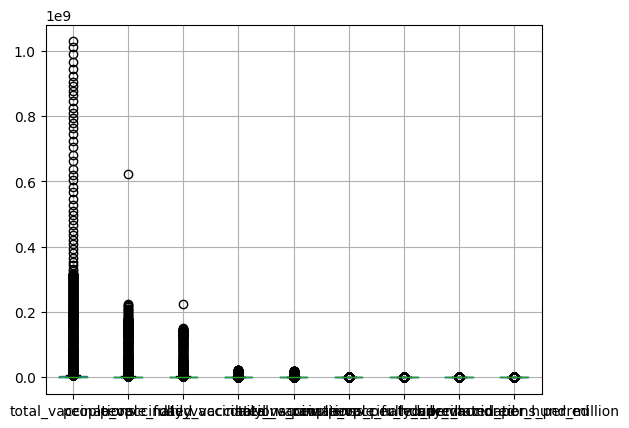

In [149]:
df.boxplot()

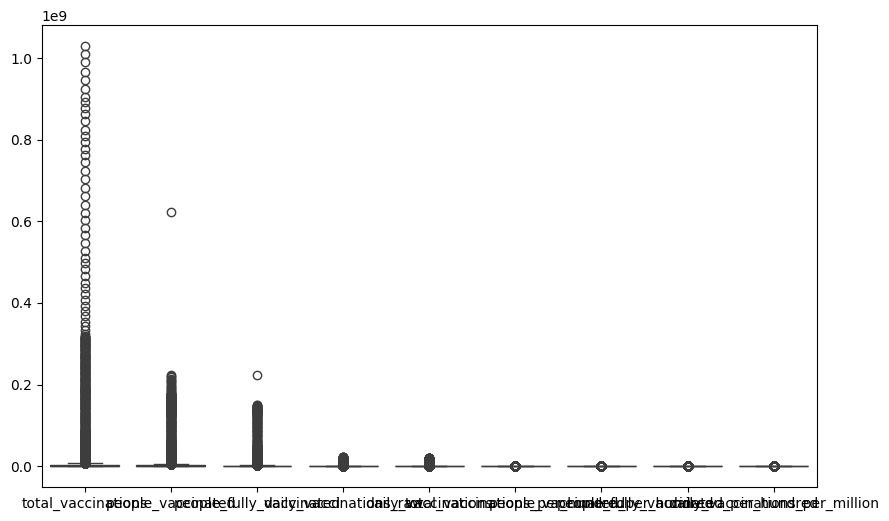

In [111]:
figsize=(10,6)
plt.figure(figsize=figsize)
sns.boxplot(data=df)
plt.show()

In [151]:
# Detect and treat outliers if necessary
# Convert relevant columns to numeric type
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce') # Use errors='coerce' to handle invalid values
    except ValueError:
        print(f"Could not convert column {col} to numeric")



In [152]:
# Calculate quantiles only on numeric columns
numeric_df = df.select_dtypes(include=['number'])
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)
df[outliers]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,969.0,NaN,NaN,NaN,12541.0,NaN,NaN,NaN
486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.0,NaN,NaN,NaN,13913.0,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1182.0,NaN,NaN,NaN,15298.0,NaN,NaN,NaN
488,NaN,NaN,NaN,26414.0,21733.0,4681.0,NaN,1050.0,34.19,28.13,6.06,13590.0,NaN,NaN,NaN
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,943.0,NaN,NaN,NaN,12205.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,NaN,NaN,NaN,13872.0,NaN,NaN,NaN
25611,NaN,NaN,NaN,8283.0,4352.0,3931.0,NaN,15.0,73.65,38.70,34.95,1334.0,NaN,NaN,NaN
25618,NaN,NaN,NaN,8365.0,4374.0,3991.0,NaN,12.0,74.38,38.89,35.49,1067.0,NaN,NaN,NaN
25625,NaN,NaN,NaN,8564.0,4445.0,4119.0,NaN,28.0,76.15,39.53,36.63,2490.0,NaN,NaN,NaN


In [153]:
IQR=q3-q1
IQR

,0
country,NaN
iso_code,NaN
date,NaN
total_vaccinations,3141119.250
people_vaccinated,2060306.250
people_fully_vaccinated,1155218.000
daily_vaccinations_raw,78608.500
daily_vaccinations,32533.000
total_vaccinations_per_hundred,32.290
people_vaccinated_per_hundred,23.155


In [115]:
df=df[~outliers]
df.shape

(20495, 15)

In [116]:
df=df.dropna()
df.shape

(0, 15)

In [117]:
df.isnull().sum()

,0
country,0
iso_code,0
date,0
total_vaccinations,0
people_vaccinated,0
people_fully_vaccinated,0
daily_vaccinations_raw,0
daily_vaccinations,0
total_vaccinations_per_hundred,0
people_vaccinated_per_hundred,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              0 non-null      float64
 1   iso_code                             0 non-null      float64
 2   date                                 0 non-null      float64
 3   total_vaccinations                   14522 non-null  float64
 4   people_vaccinated                    13762 non-null  float64
 5   people_fully_vaccinated              11041 non-null  float64
 6   daily_vaccinations_raw               12003 non-null  float64
 7   daily_vaccinations                   25595 non-null  float64
 8   total_vaccinations_per_hundred       14522 non-null  float64
 9   people_vaccinated_per_hundred        13762 non-null  float64
 10  people_fully_vaccinated_per_hundred  11041 non-null  float64
 11  daily_vaccinations_per_milli

In [119]:
df=df.drop(['source_name','source_website'],axis=1)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines


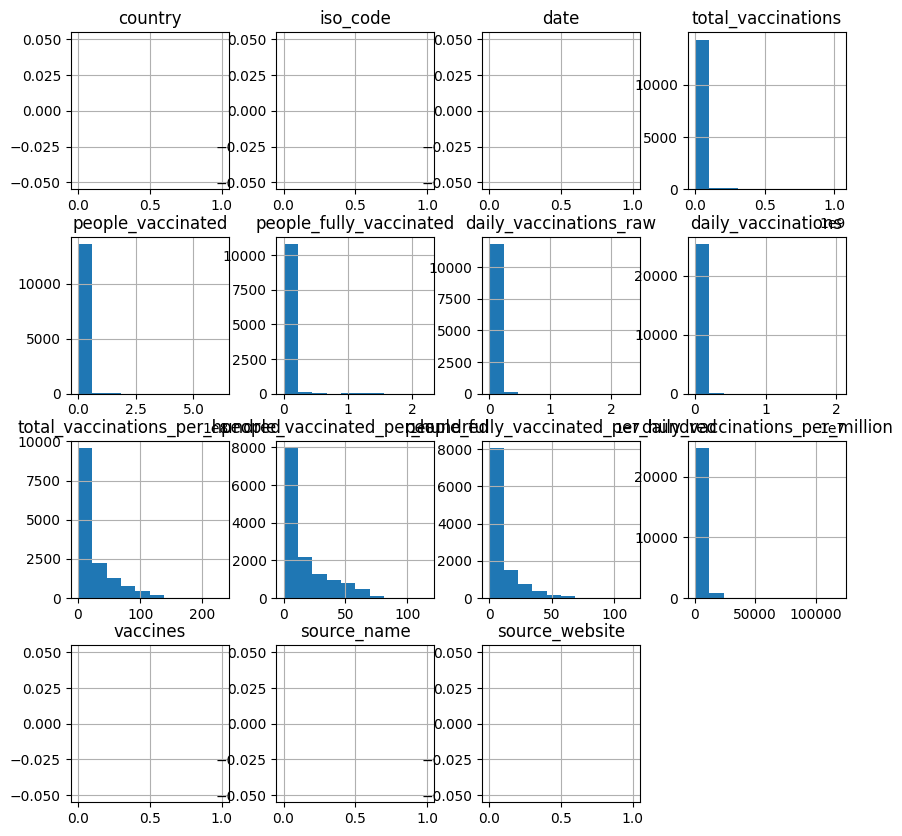

In [155]:
#data visulazation
df.hist(figsize=(10,10))
plt.show()

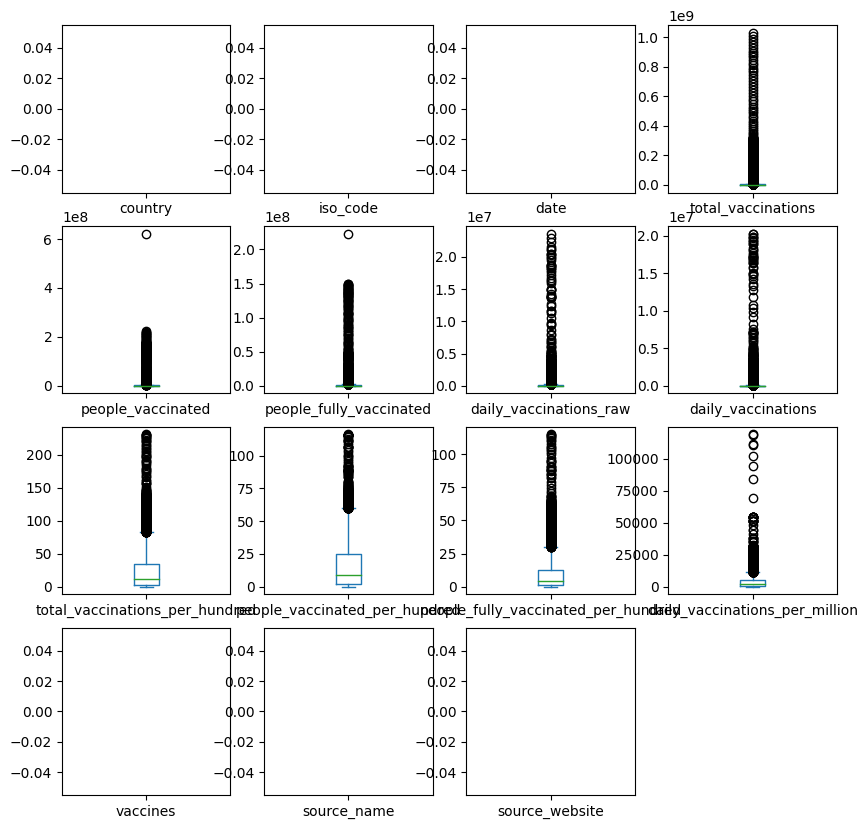

In [156]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))
plt.show()

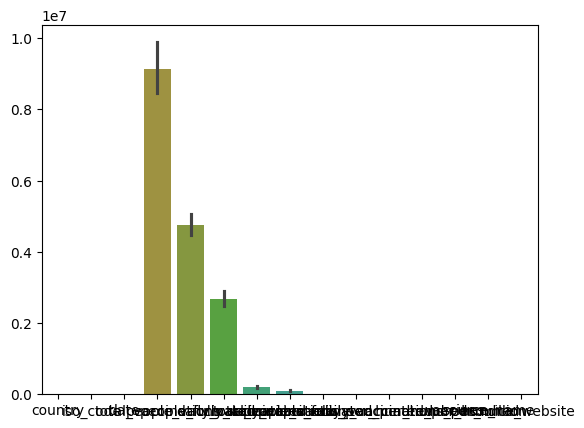

In [157]:
sns.barplot(data=df)
plt.show()

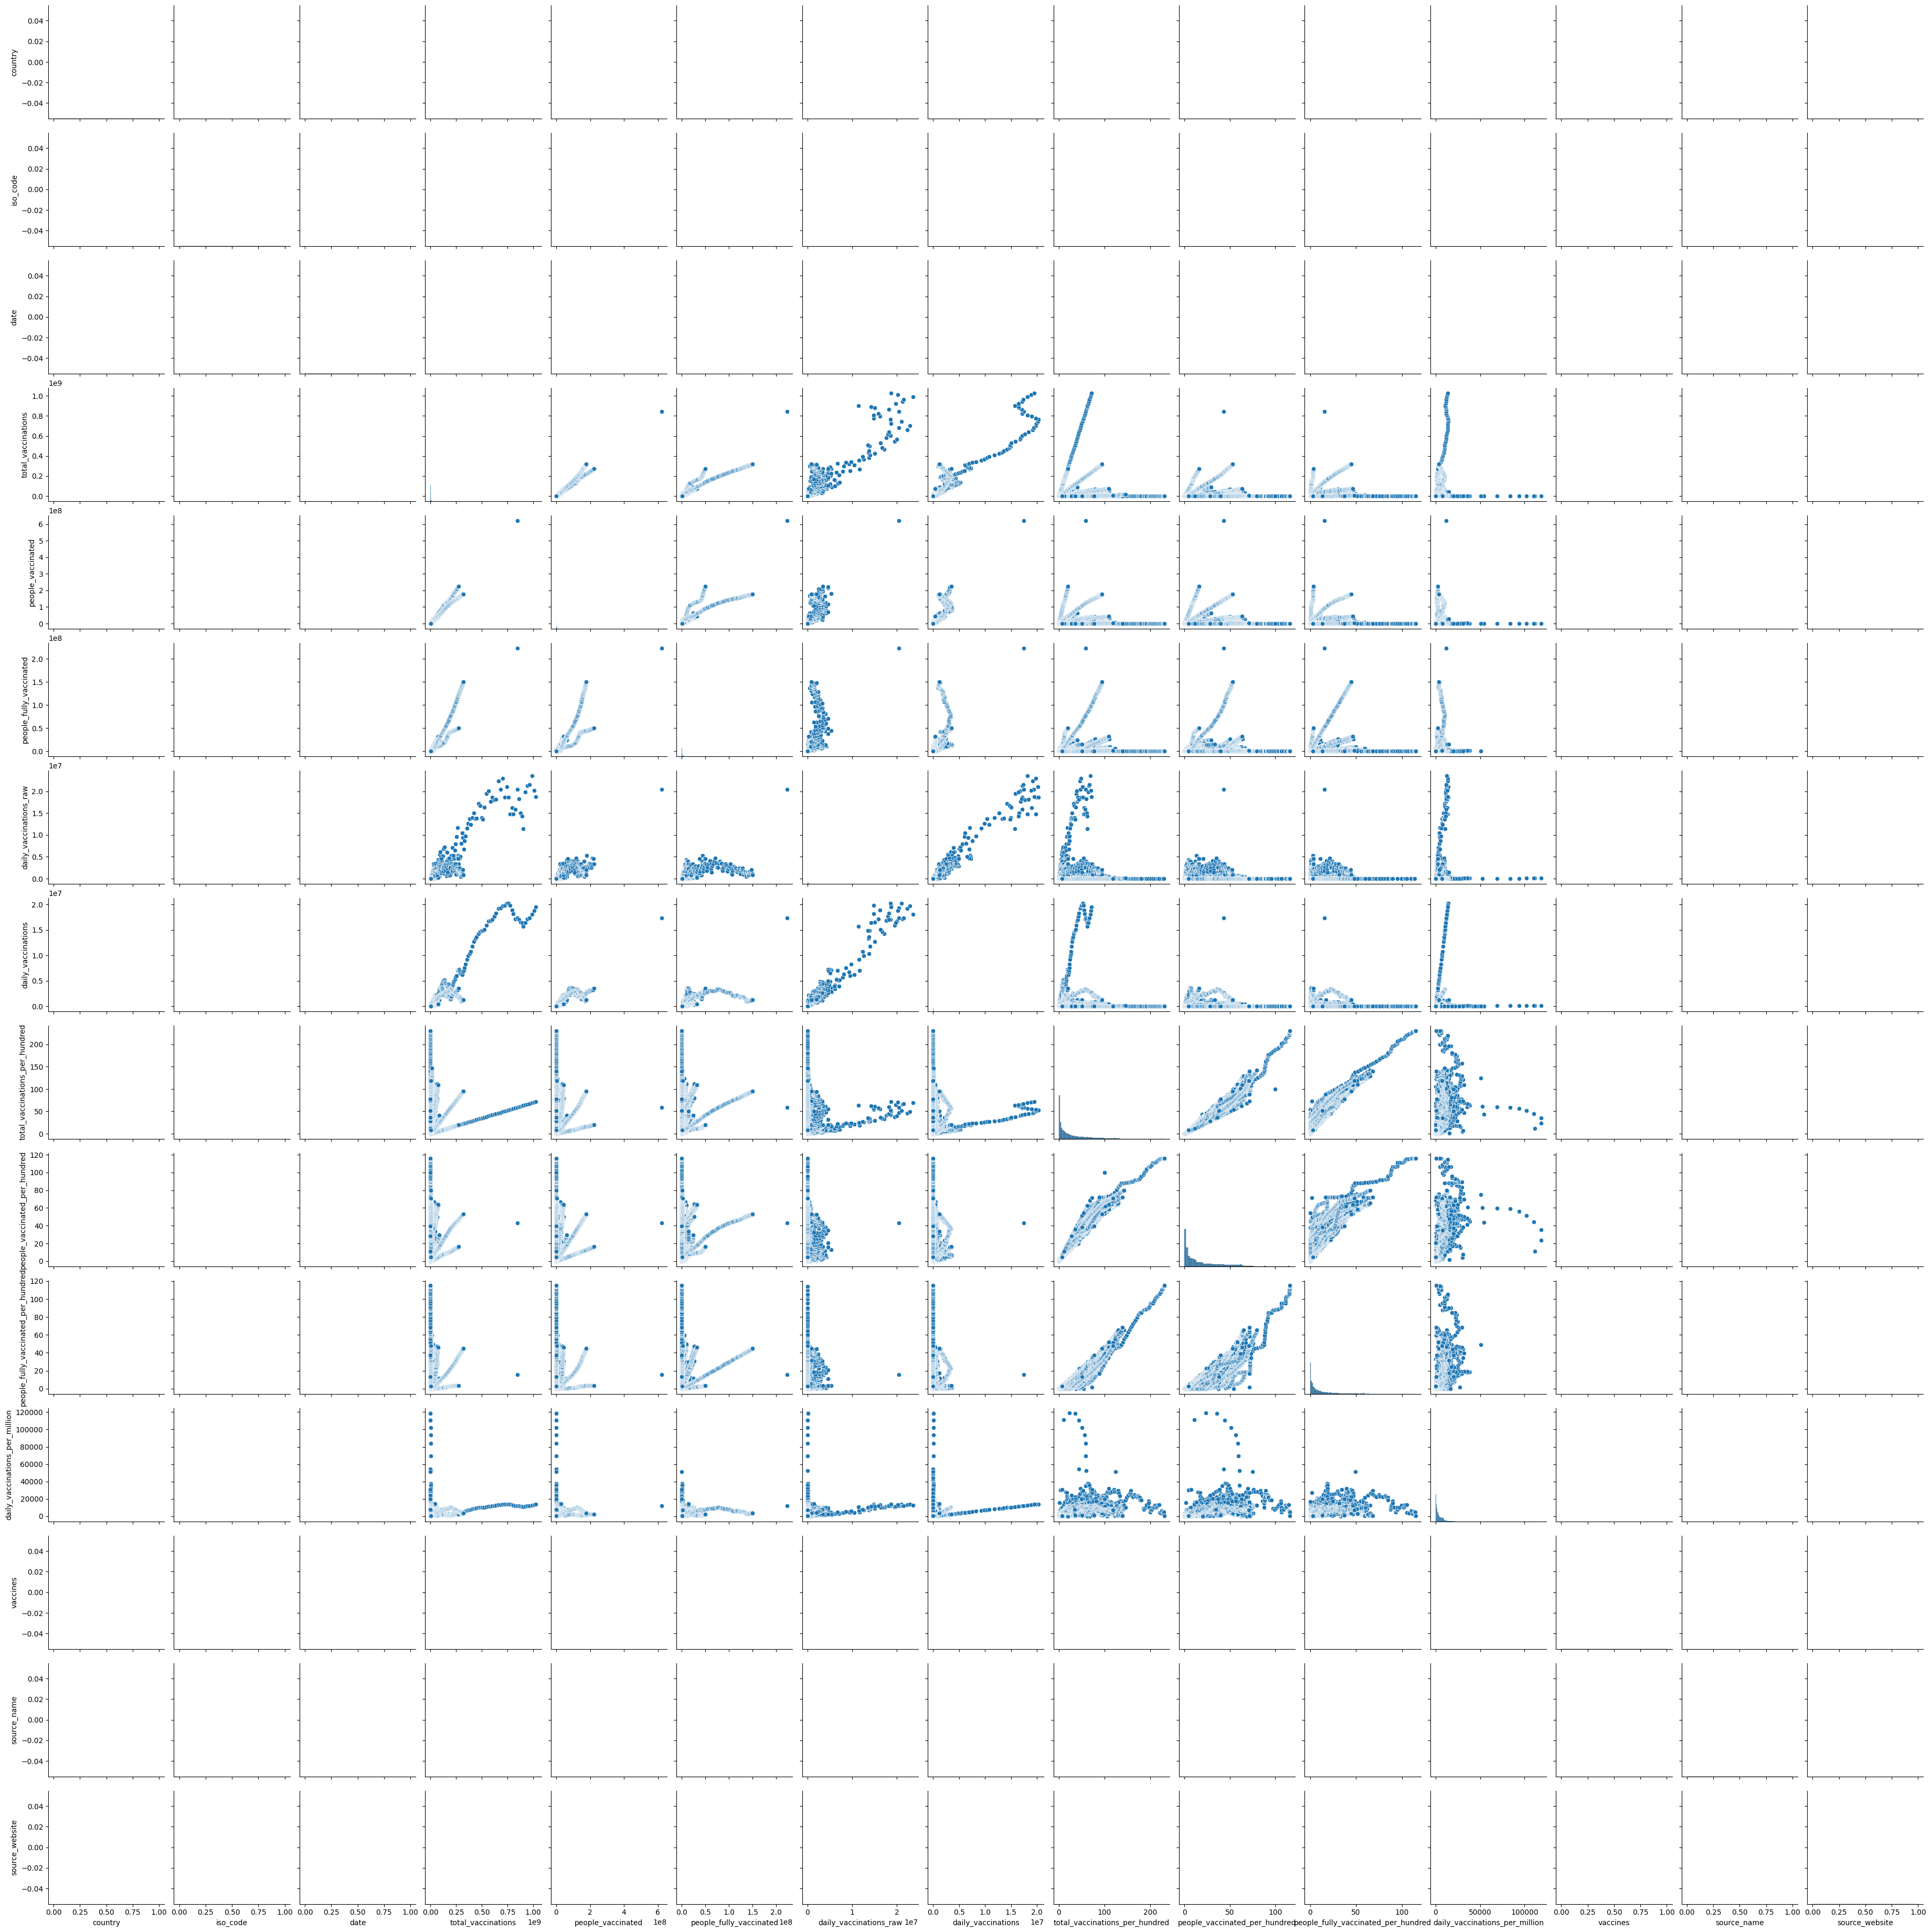

In [158]:
sns.pairplot(df)
plt.show()

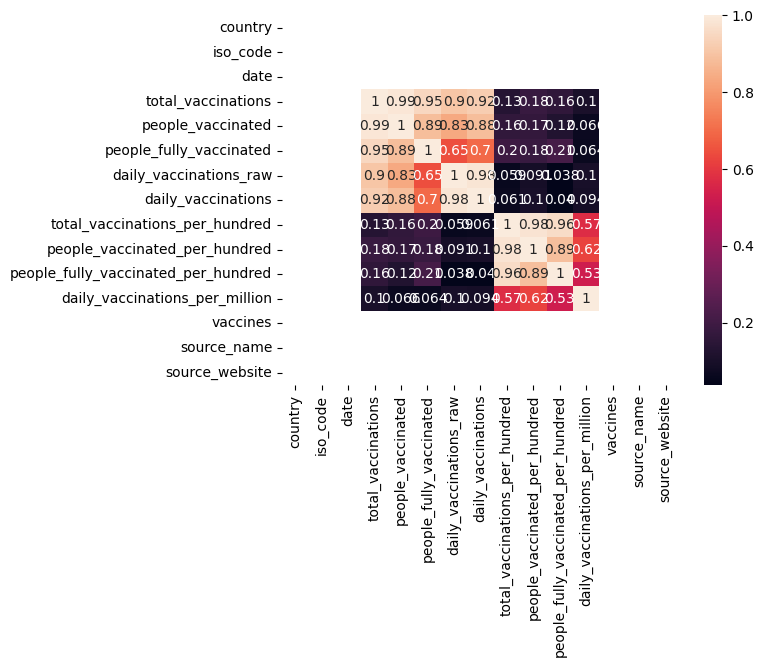

In [159]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [160]:
print(df.shape)
print(df.head())

(25862, 15)
   country  iso_code  date  total_vaccinations  people_vaccinated  \
0      NaN       NaN   NaN                 0.0                0.0   
1      NaN       NaN   NaN                 NaN                NaN   
2      NaN       NaN   NaN                 NaN                NaN   
3      NaN       NaN   NaN                 NaN                NaN   
4      NaN       NaN   NaN                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                           

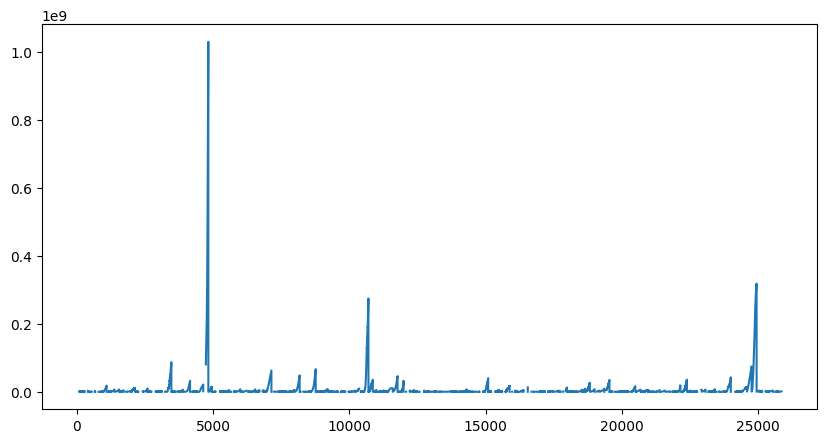

In [161]:
df['total_vaccinations'].plot(figsize=(10,5))
plt.show()

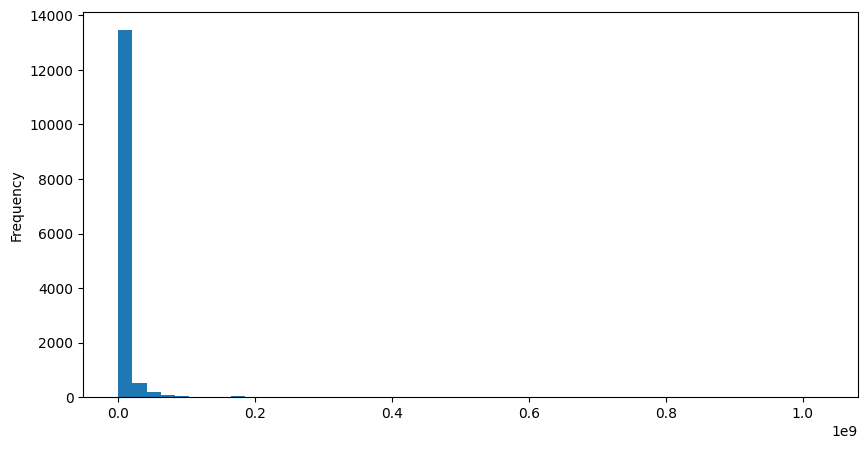

In [163]:
df['total_vaccinations'].plot(kind='hist',bins=50,figsize=(10,5))
plt.show()

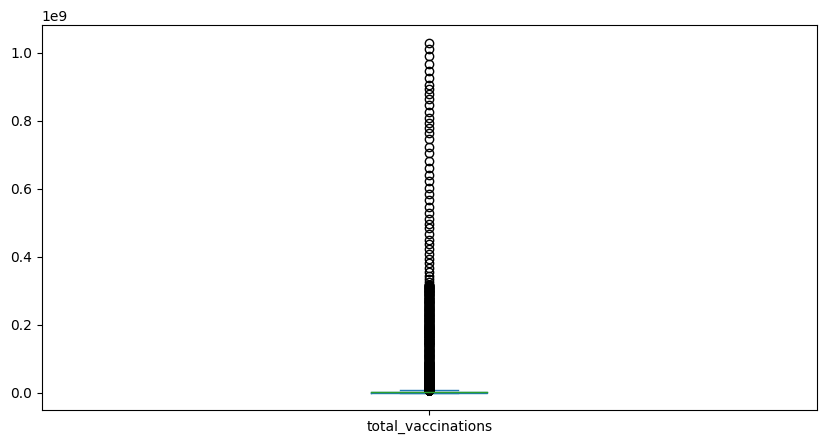

In [164]:
df['total_vaccinations'].plot(kind='box',figsize=(10,5))
plt.show()

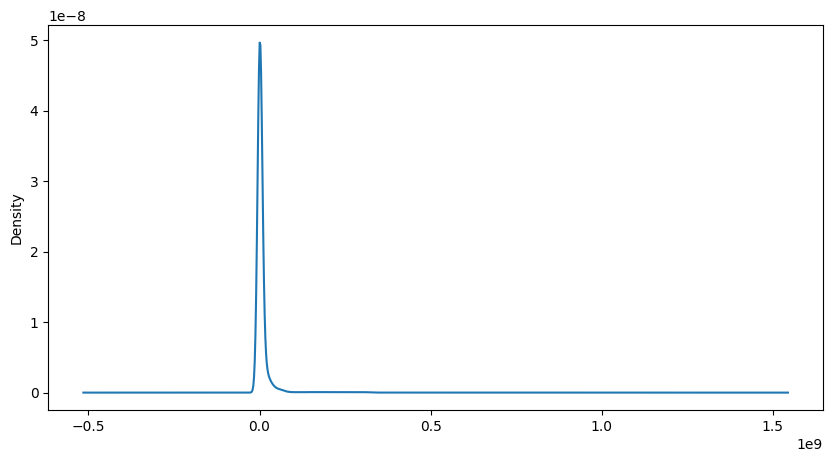

In [165]:
df['total_vaccinations'].plot(kind='kde',figsize=(10,5))
plt.show()

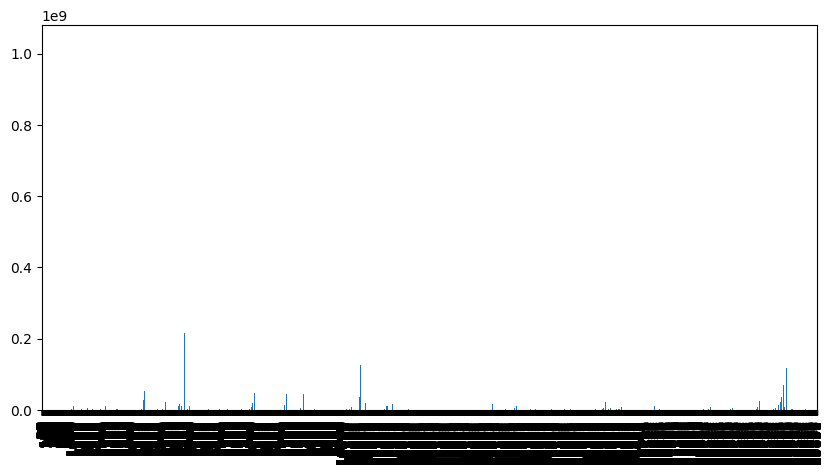

In [166]:
df['total_vaccinations'].plot(kind='bar',figsize=(10,5))
plt.show()

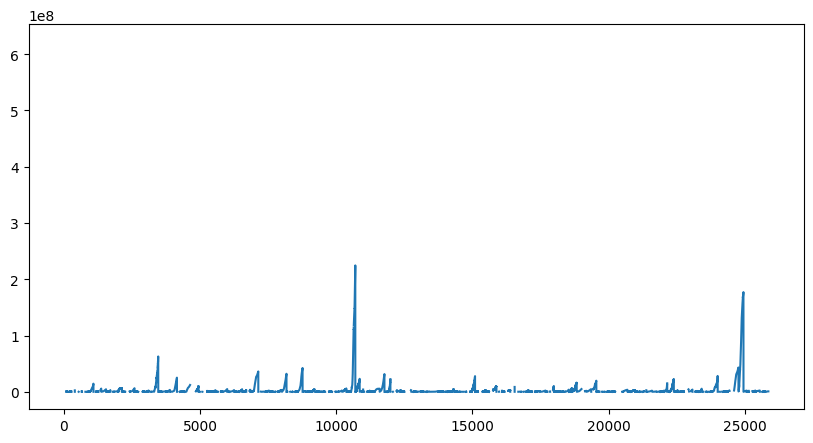

In [170]:
df['people_vaccinated'].plot(figsize=(10,5))
plt.show()

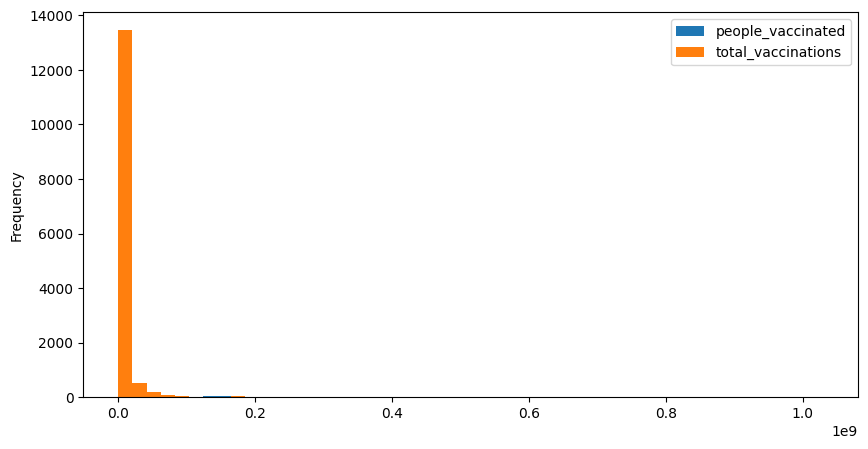

In [174]:
df[['people_vaccinated','total_vaccinations']].plot(kind='hist',bins=50,figsize=(10,5)) # Use a list of column names to select the desired columns for the histogram
plt.show()

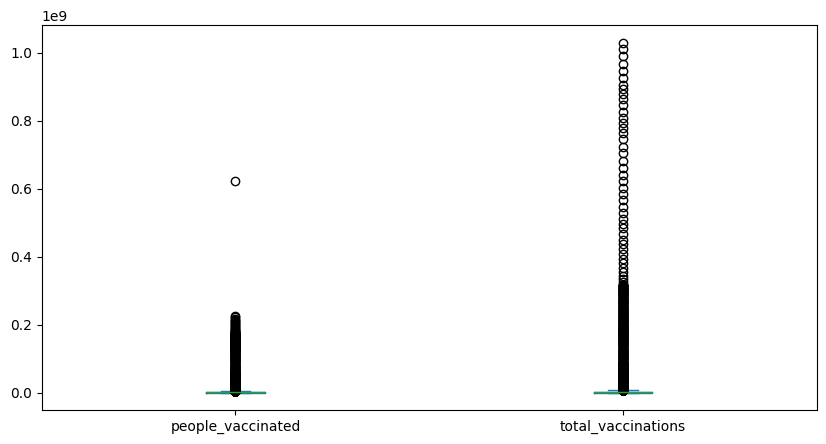

In [175]:
df[['people_vaccinated','total_vaccinations']].plot(kind='box',figsize=(10,5))
plt.show()

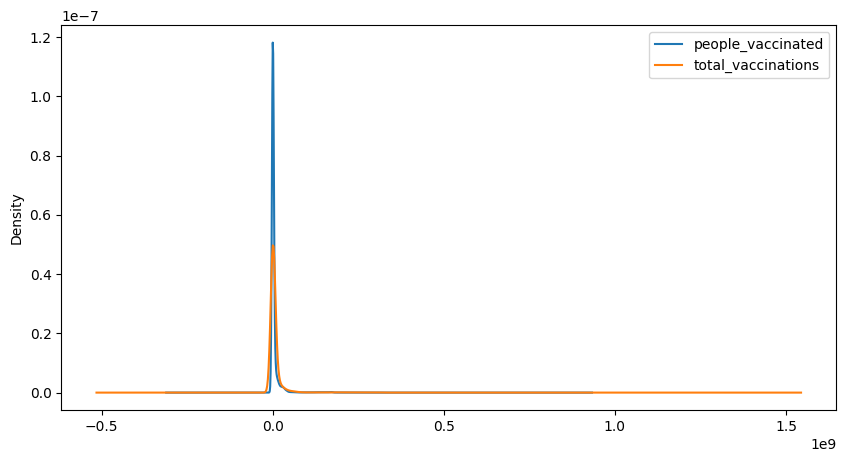

In [176]:
df[['people_vaccinated','total_vaccinations']].plot(kind='kde',figsize=(10,5))
plt.show()

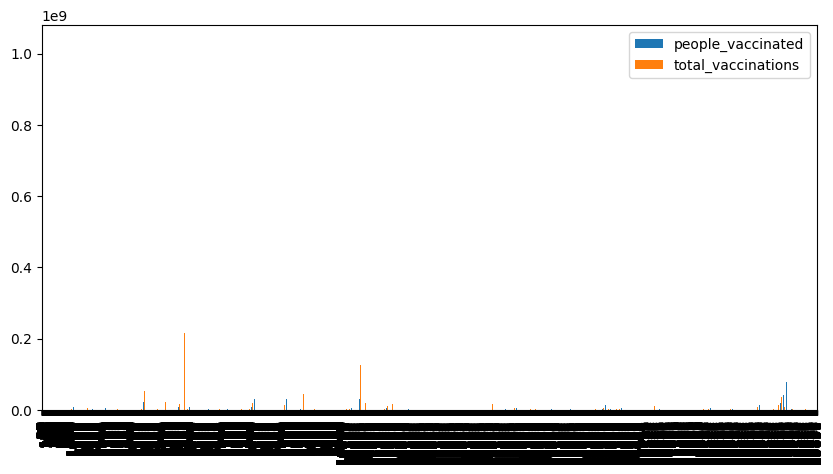

In [177]:
df[['people_vaccinated','total_vaccinations']].plot(kind='bar',figsize=(10,5))
plt.show()

In [178]:
#feature scaling
#standrazation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['people_vaccinated','total_vaccinations']]=scaler.fit_transform(df[['people_vaccinated','total_vaccinations']])
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,NaN,NaN,NaN,-0.198999,-0.263637,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25857,NaN,NaN,NaN,-0.174593,-0.224830,423474.0,7395.0,5270.0,7.54,4.69,2.85,355.0,NaN,NaN,NaN
25858,NaN,NaN,NaN,-0.174479,-0.224744,427134.0,5214.0,5226.0,7.58,4.70,2.87,352.0,NaN,NaN,NaN
25859,NaN,NaN,NaN,-0.174364,-0.224672,431153.0,5310.0,4935.0,7.61,4.71,2.90,332.0,NaN,NaN,NaN
25860,NaN,NaN,NaN,-0.174309,-0.224610,432572.0,2523.0,4360.0,7.63,4.72,2.91,293.0,NaN,NaN,NaN


In [179]:
sc=StandardScaler()
df[['people_vaccinated','total_vaccinations']]=sc.fit_transform(df[['people_vaccinated','total_vaccinations']])
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,NaN,NaN,NaN,-0.198999,-0.263637,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25857,NaN,NaN,NaN,-0.174593,-0.224830,423474.0,7395.0,5270.0,7.54,4.69,2.85,355.0,NaN,NaN,NaN
25858,NaN,NaN,NaN,-0.174479,-0.224744,427134.0,5214.0,5226.0,7.58,4.70,2.87,352.0,NaN,NaN,NaN
25859,NaN,NaN,NaN,-0.174364,-0.224672,431153.0,5310.0,4935.0,7.61,4.71,2.90,332.0,NaN,NaN,NaN
25860,NaN,NaN,NaN,-0.174309,-0.224610,432572.0,2523.0,4360.0,7.63,4.72,2.91,293.0,NaN,NaN,NaN


In [182]:
sc=StandardScaler()
x=df[['people_vaccinated','total_vaccinations']]
df[['people_vaccinated','total_vaccinations']]=sc.fit_transform(x)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,NaN,NaN,NaN,-0.198999,-0.263637,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25857,NaN,NaN,NaN,-0.174593,-0.224830,423474.0,7395.0,5270.0,7.54,4.69,2.85,355.0,NaN,NaN,NaN
25858,NaN,NaN,NaN,-0.174479,-0.224744,427134.0,5214.0,5226.0,7.58,4.70,2.87,352.0,NaN,NaN,NaN
25859,NaN,NaN,NaN,-0.174364,-0.224672,431153.0,5310.0,4935.0,7.61,4.71,2.90,332.0,NaN,NaN,NaN
25860,NaN,NaN,NaN,-0.174309,-0.224610,432572.0,2523.0,4360.0,7.63,4.72,2.91,293.0,NaN,NaN,NaN


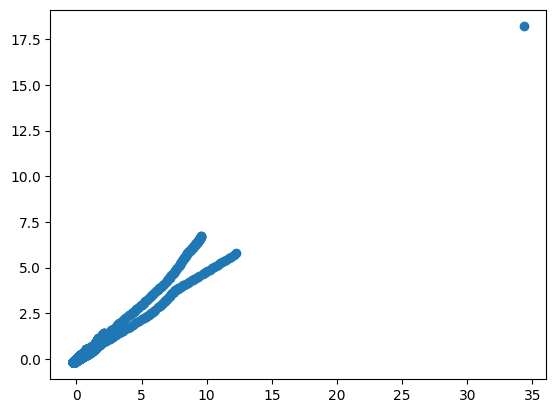

In [183]:
#scatter plot
plt.scatter(df['people_vaccinated'],df['total_vaccinations'])
plt.show()

In [184]:
#model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [188]:
cluster=df.drop('people_vaccinated',axis=1)
cluster

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,NaN,NaN,NaN,-0.198999,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25857,NaN,NaN,NaN,-0.174593,423474.0,7395.0,5270.0,7.54,4.69,2.85,355.0,NaN,NaN,NaN
25858,NaN,NaN,NaN,-0.174479,427134.0,5214.0,5226.0,7.58,4.70,2.87,352.0,NaN,NaN,NaN
25859,NaN,NaN,NaN,-0.174364,431153.0,5310.0,4935.0,7.61,4.71,2.90,332.0,NaN,NaN,NaN
25860,NaN,NaN,NaN,-0.174309,432572.0,2523.0,4360.0,7.63,4.72,2.91,293.0,NaN,NaN,NaN


In [189]:
from sklearn.cluster import KMeans


In [193]:
# Impute missing values using the mean
cluster = cluster.fillna(cluster.mean())

# Verify if there are still any NaN values left
print(cluster.isnull().sum().sum())

# Check if there are still any NaN values
if cluster.isnull().values.any():
  # Handle remaining NaN values (e.g., fill with 0 or drop rows/columns)
  cluster.fillna(0, inplace=True)
  # You can also use: cluster.dropna(inplace=True)

#kMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(cluster)

155172


KMeans(n_clusters=3)

In [194]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

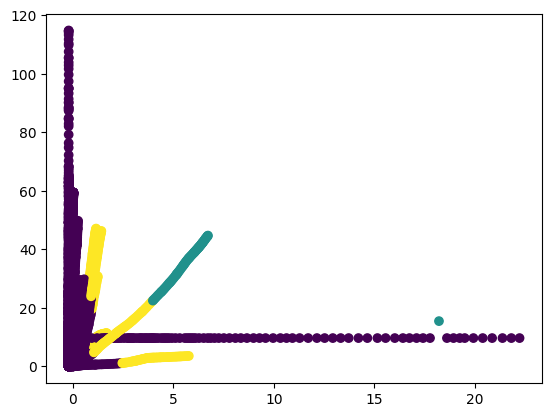

In [195]:
plt.scatter(cluster['total_vaccinations'],cluster['people_fully_vaccinated_per_hundred'],c=kmeans.labels_)
plt.show()

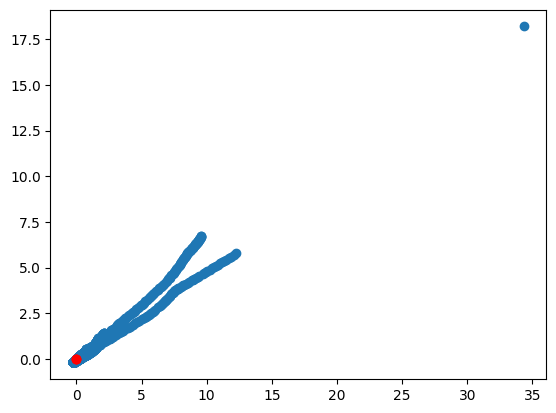

In [200]:
# Convert the DataFrame to a NumPy array
##x = x.values

# Now you can use NumPy slicing
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()


In [210]:
from sklearn.cluster import KMeans
import numpy as np

# Create a KMeans object with 3 clusters
km = KMeans(n_clusters=3)

# Check if there are still any NaN values
if np.isnan(x).any():
  # Handle remaining NaN values (e.g., fill with 0 or drop rows/columns)
  x = np.nan_to_num(x) # Replace NaN with 0

# Fit the model to your data and predict the clusters
yp = km.fit_predict(x)

# Print the predicted clusters
print(yp)

[0 0 0 ... 0 0 0]


In [207]:
len(yp)

25862

In [209]:
#cluster center
km.cluster_centers_

array([[-5.05608000e-02, -5.14581181e-02],
       [-1.23259516e-32,  1.40447699e+01],
       [ 7.86174476e+00,  4.51135704e+00]])

In [211]:
#spending score
km.inertia_

6506.703080859687

In [224]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [225]:
km.n_iter_

6

In [227]:
#elbow cure
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(cluster)
  wcss.append(kmeans.inertia_)
  print(wcss)

[1.3477603438821486e+18]
[1.3477603438821486e+18, 3.764164539321758e+17]
[1.3477603438821486e+18, 3.764164539321758e+17, 1.9447924490066954e+17]
[1.3477603438821486e+18, 3.764164539321758e+17, 1.9447924490066954e+17, 1.3498533020990568e+17]
[1.3477603438821486e+18, 3.764164539321758e+17, 1.9447924490066954e+17, 1.3498533020990568e+17, 9.943846918063366e+16]
[1.3477603438821486e+18, 3.764164539321758e+17, 1.9447924490066954e+17, 1.3498533020990568e+17, 9.943846918063366e+16, 7.510862246275786e+16]
[1.3477603438821486e+18, 3.764164539321758e+17, 1.9447924490066954e+17, 1.3498533020990568e+17, 9.943846918063366e+16, 7.510862246275786e+16, 5.368612519891823e+16]
[1.3477603438821486e+18, 3.764164539321758e+17, 1.9447924490066954e+17, 1.3498533020990568e+17, 9.943846918063366e+16, 7.510862246275786e+16, 5.368612519891823e+16, 3.764521305446287e+16]
[1.3477603438821486e+18, 3.764164539321758e+17, 1.9447924490066954e+17, 1.3498533020990568e+17, 9.943846918063366e+16, 7.510862246275786e+16, 5.3

In [228]:
elbow=pd.DataFrame({'cluster':range(1,11),'WCSS':wcss})
elbow

,cluster,WCSS
0,1,1.347760e+18
1,2,3.764165e+17
2,3,1.944792e+17
3,4,1.349853e+17
4,5,9.943847e+16
5,6,7.510862e+16
6,7,5.368613e+16
7,8,3.764521e+16
8,9,2.918760e+16
9,10,2.382887e+16


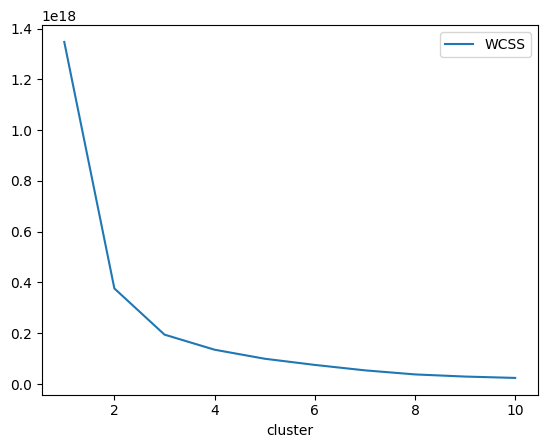

In [229]:
elbow.plot(x='cluster',y='WCSS')
plt.show()

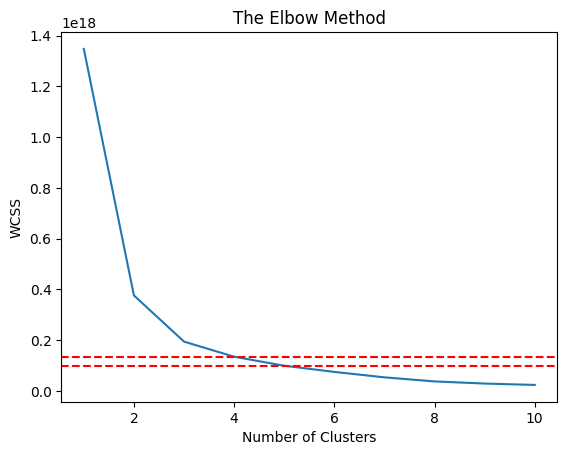

In [234]:
#elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.axhline(y=wcss[3],color='r',linestyle='--')
plt.axhline(y=wcss[4],color='r',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

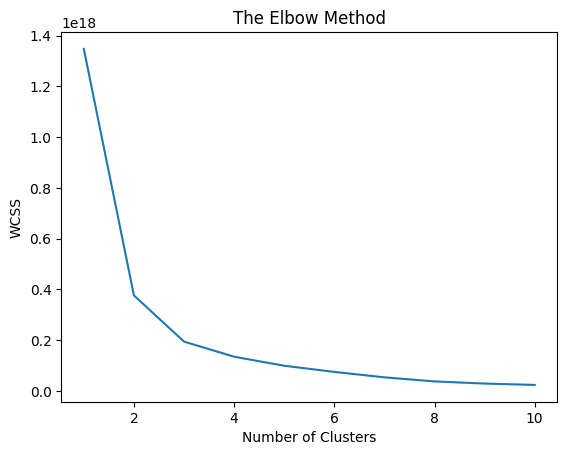

In [231]:
#wcss
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [232]:
wcss

[1.3477603438821486e+18,
 3.764164539321758e+17,
 1.9447924490066954e+17,
 1.3498533020990568e+17,
 9.943846918063366e+16,
 7.510862246275786e+16,
 5.368612519891823e+16,
 3.764521305446287e+16,
 2.9187598970437904e+16,
 2.382886625616802e+16]

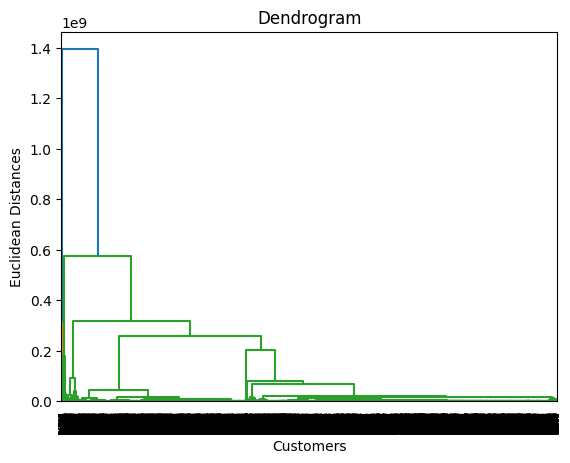

In [236]:
#dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(cluster,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [241]:
#final model
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(cluster)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [243]:
from sklearn.metrics import silhouette_score # import the silhouette_score function from the sklearn.metrics module

silhouette_score(cluster,y_hc)

0.9314908488571443